* Pobrać z kaglehub wybrany dataset
* wykorzystać pandas i obliczyć poznane statystyki opisowe kolumn numerycznych
* Wygenerować 4 wykresy najlepiej opisujące dany dataset i do każdego dołączyć komentarz opisujący dlaczego dany wykres pasuje do użytych danych.
* Napisać podsumowanie, w któym należy podać pomysł wykorzystania wybranego datasetu.

## Import bibliotek i pobranie datasetu

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import kagglehub
from kagglehub import KaggleDatasetAdapter
import json
import os

c:\Users\marci\Documents\_SCHOOL\NOD\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
file_path = "shopping_behavior_updated.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ranaghulamnabi/shopping-behavior-and-preferences-study",
  file_path,
)
df.head()

C:\Users\marci\AppData\Local\Temp\ipykernel_23492\2512803823.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually



## Podstawowe Statystyki

In [5]:
# Maximum
np.max(df["Purchase Amount (USD)"])

np.int64(100)

In [6]:
# Minimum
np.min(df["Purchase Amount (USD)"])

np.int64(20)

In [7]:
# Srednia
np.mean(df["Purchase Amount (USD)"])

np.float64(59.76435897435898)

In [8]:
# Ilość wierszy
len(df["Purchase Amount (USD)"])

3900

In [9]:
# Mediana
np.median(df["Purchase Amount (USD)"])

np.float64(60.0)

In [10]:
# Odchylenie standardowe
np.std(df["Purchase Amount (USD)"])

np.float64(23.68235546744711)

In [11]:
# Wariancja
np.var(df["Purchase Amount (USD)"])

np.float64(560.8539604865219)

In [12]:
# Korelacja
np.corrcoef(df["Purchase Amount (USD)"], df["Age"])[0,1]

np.float64(-0.010423647378686531)

In [13]:
# Kowariancja
covariance = np.cov(df["Purchase Amount (USD)"], df["Age"])
covariance

array([[560.99780608,  -3.75457395],
       [ -3.75457395, 231.27076706]])

In [14]:
np.corrcoef(df["Purchase Amount (USD)"], df["Age"])[0,1]

np.float64(-0.010423647378686531)

In [15]:
corelation = covariance[0,1] / (np.sqrt(covariance[0,0]) * np.sqrt(covariance[1,1]))
corelation

np.float64(-0.010423647378686533)

## Wykresy opisujące dane

In [16]:
PLOTS_DIR = "plotki"

# Create a directory to save the plots
os.makedirs(PLOTS_DIR, exist_ok=True)

In [17]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.dropna(subset=['Purchase Amount (USD)', 'Age', 'Gender', 'Category', 'Frequency of Purchases', 'Payment Method', 'Item Purchased'], inplace=True)

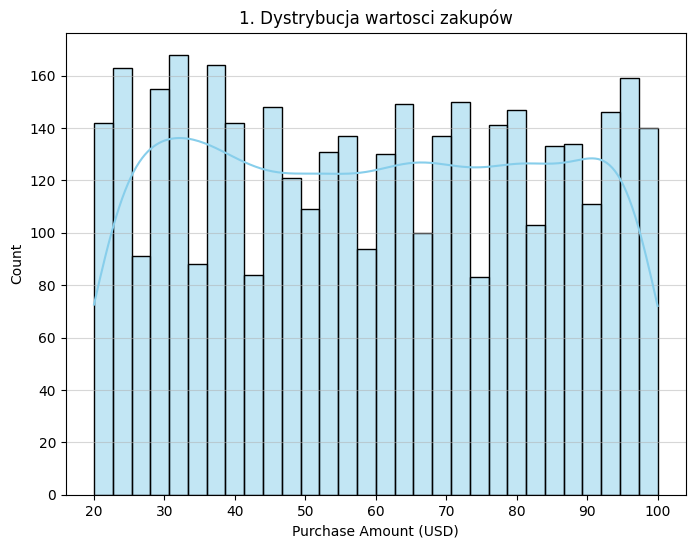

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True, color='skyblue')
plt.title('1. Dystrybucja wartosci zakupów')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.savefig(os.path.join(PLOTS_DIR, '1_purchase_amount_distribution.png'))
plt.show()
plt.close()

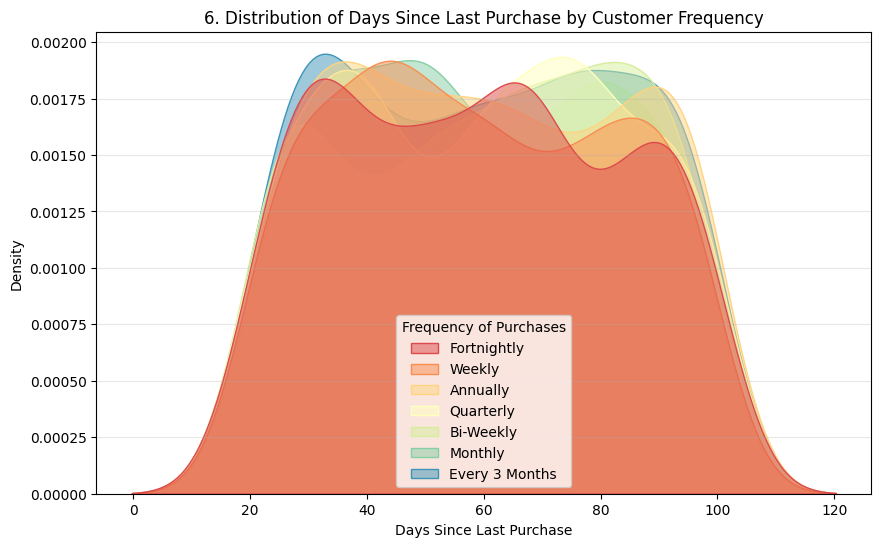

In [25]:
plt.figure(figsize=(10, 6))
    # Using a Density Plot (KDE) for a smooth comparison of distributions
sns.kdeplot(
    data=df, 
    x='Purchase Amount (USD)', 
    hue='Frequency of Purchases', 
    fill=True, 
    alpha=.5, 
    palette='Spectral'
    )
plt.title('6. Distribution of Days Since Last Purchase by Customer Frequency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.3)
plt.savefig(os.path.join(PLOTS_DIR, '2_spending_by_gender_boxplot.png'))
plt.show()
plt.close()

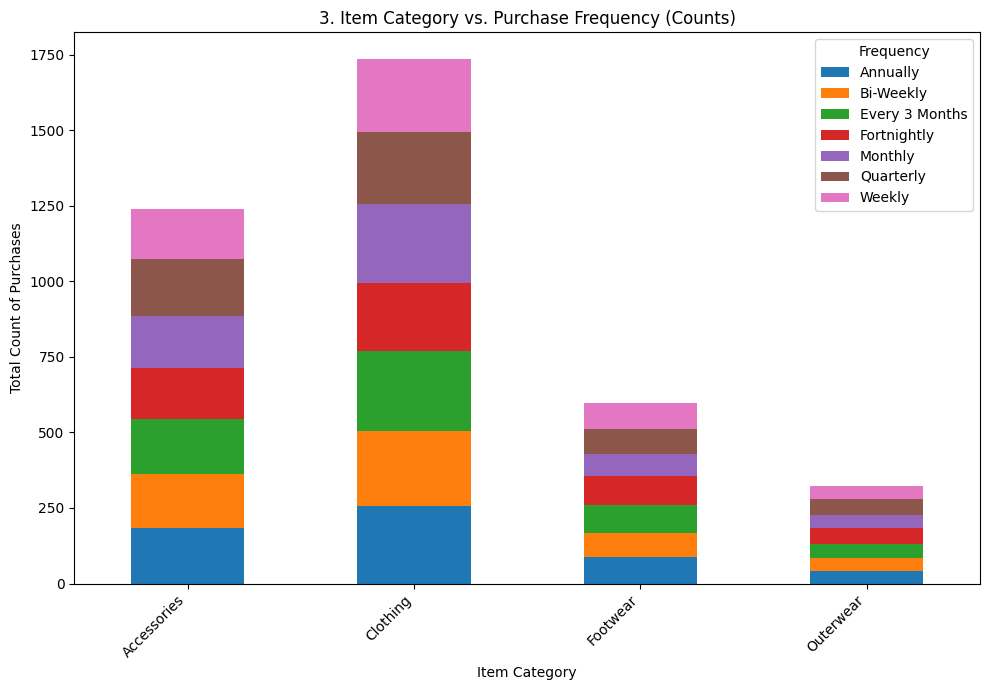

In [20]:
frequency_category_counts = pd.crosstab(df['Category'], df['Frequency of Purchases'])

plt.figure(figsize=(10, 7))
frequency_category_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('3. Item Category vs. Purchase Frequency (Counts)')
plt.xlabel('Item Category')
plt.ylabel('Total Count of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Frequency')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, '3_category_frequency_stacked_bar.png'))
plt.show()
plt.close()

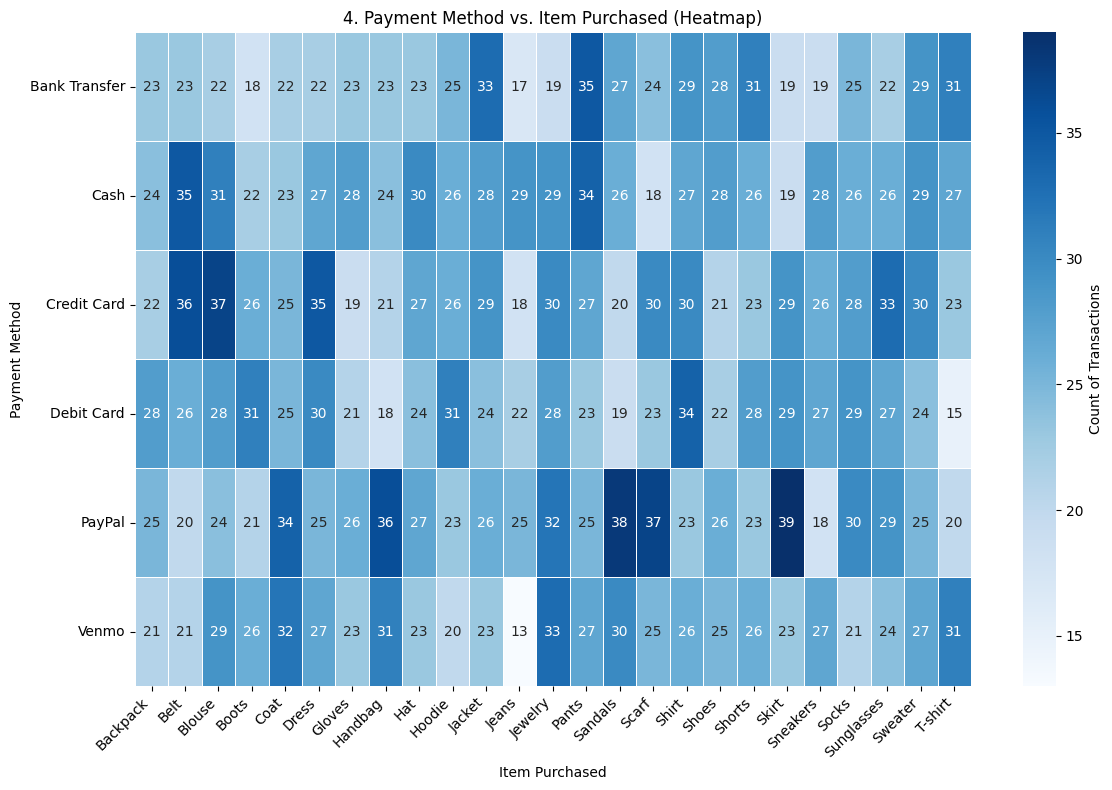

In [21]:
heatmap_data = df.pivot_table(
    index='Payment Method',
    columns='Item Purchased',
    aggfunc='size',
    fill_value=0 # Fill NaN with 0 for better visualization
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,        # Show the count in each cell
    fmt='d',           # Format as integers
    cmap='Blues',      # Color map
    linewidths=.5,     # Add lines between cells
    cbar_kws={'label': 'Count of Transactions'}
)
plt.title('4. Payment Method vs. Item Purchased (Heatmap)')
plt.xlabel('Item Purchased')
plt.ylabel('Payment Method')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, '4_payment_item_heatmap.png'))
plt.show()
plt.close()